# Sentiment Classification & How To "Frame Problems" for a Neural Network

by Andrew Trask

- **Twitter**: @iamtrask
- **Blog**: http://iamtrask.github.io

### What You Should Already Know

- neural networks, forward and back-propagation
- stochastic gradient descent
- mean squared error
- and train/test splits

### Where to Get Help if You Need it
- Re-watch previous Udacity Lectures
- Leverage the recommended Course Reading Material - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) (40% Off: **traskud17**)
- Shoot me a tweet @iamtrask


### Tutorial Outline:

- Intro: The Importance of "Framing a Problem"


- Curate a Dataset
- Developing a "Predictive Theory"
- **PROJECT 1**: Quick Theory Validation


- Transforming Text to Numbers
- **PROJECT 2**: Creating the Input/Output Data


- Putting it all together in a Neural Network
- **PROJECT 3**: Building our Neural Network


- Understanding Neural Noise
- **PROJECT 4**: Making Learning Faster by Reducing Noise


- Analyzing Inefficiencies in our Network
- **PROJECT 5**: Making our Network Train and Run Faster


- Further Noise Reduction
- **PROJECT 6**: Reducing Noise by Strategically Reducing the Vocabulary


- Analysis: What's going on in the weights?

# Lesson: Curate a Dataset

In [1]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

In [2]:
len(reviews)

25000

In [3]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [4]:
labels[0]

'POSITIVE'

# Lesson: Develop a Predictive Theory

In [5]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


# Project 1: Quick Theory Validation

In [6]:
from collections import Counter
import numpy as np

In [7]:
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

In [8]:
for i in range(len(reviews)):
    if(labels[i] == 'POSITIVE'):
        for word in reviews[i].split(" "):
            positive_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in reviews[i].split(" "):
            negative_counts[word] += 1
            total_counts[word] += 1

In [9]:
positive_counts.most_common()

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235),
 ('it', 48025),
 ('i', 40743),
 ('that', 35630),
 ('this', 35080),
 ('s', 33815),
 ('as', 26308),
 ('with', 23247),
 ('for', 22416),
 ('was', 21917),
 ('film', 20937),
 ('but', 20822),
 ('movie', 19074),
 ('his', 17227),
 ('on', 17008),
 ('you', 16681),
 ('he', 16282),
 ('are', 14807),
 ('not', 14272),
 ('t', 13720),
 ('one', 13655),
 ('have', 12587),
 ('be', 12416),
 ('by', 11997),
 ('all', 11942),
 ('who', 11464),
 ('an', 11294),
 ('at', 11234),
 ('from', 10767),
 ('her', 10474),
 ('they', 9895),
 ('has', 9186),
 ('so', 9154),
 ('like', 9038),
 ('about', 8313),
 ('very', 8305),
 ('out', 8134),
 ('there', 8057),
 ('she', 7779),
 ('what', 7737),
 ('or', 7732),
 ('good', 7720),
 ('more', 7521),
 ('when', 7456),
 ('some', 7441),
 ('if', 7285),
 ('just', 7152),
 ('can', 7001),
 ('story', 6780),
 ('time', 6515),
 ('my', 6488),
 ('g

In [61]:
pos_neg_ratios = Counter()

for term,cnt in list(total_counts.most_common()):
    if(cnt > 250):
        pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
        pos_neg_ratios[term] = pos_neg_ratio

for word,ratio in pos_neg_ratios.most_common():
    if(ratio > 1):
        pos_neg_ratios[word] = np.log(ratio)
    else:
        pos_neg_ratios[word] = -np.log((1 / (ratio+0.01)))

In [62]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

[('wonderfully', 2.0218960560332353),
 ('delightful', 1.8002701588959635),
 ('beautifully', 1.7626953362841438),
 ('superb', 1.7091514458966952),
 ('welles', 1.6677068205580761),
 ('touching', 1.637217476541176),
 ('stewart', 1.6119987332957739),
 ('friendship', 1.5677652160335325),
 ('wonderful', 1.5645425925262093),
 ('magnificent', 1.54663701119507),
 ('finest', 1.5462590108125689),
 ('fantastic', 1.5048433868558566),
 ('terrific', 1.5026699370083942),
 ('noir', 1.493925025312256),
 ('outstanding', 1.4910053152089213),
 ('marie', 1.4825711915553104),
 ('excellent', 1.4647538505723599),
 ('gem', 1.3932148039644643),
 ('amazing', 1.3919815802404802),
 ('kelly', 1.3461743673304654),
 ('powerful', 1.2999662776313934),
 ('remarkable', 1.2883688239495823),
 ('favorite', 1.2668956297860055),
 ('stunning', 1.2622417124499117),
 ('perfect', 1.246742480713785),
 ('favourite', 1.2411123512753928),
 ('journey', 1.2367626271489269),
 ('bond', 1.2321436812926323),
 ('brilliant', 1.228755413766478

In [63]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

[('unfunny', -2.5545257844967644),
 ('waste', -2.4907515123361046),
 ('pointless', -2.3451073877136341),
 ('redeeming', -2.2667790015910296),
 ('worst', -2.1930856334332267),
 ('laughable', -2.172468615469592),
 ('awful', -2.1385076866397488),
 ('poorly', -2.1326133844207011),
 ('sucks', -1.9166645809588516),
 ('lame', -1.9117232884159072),
 ('horrible', -1.844894301366784),
 ('pathetic', -1.8356498920533246),
 ('wasted', -1.7773187850732606),
 ('crap', -1.7677639636718392),
 ('badly', -1.6974777654416224),
 ('worse', -1.6820086052689358),
 ('terrible', -1.6742829939664696),
 ('mess', -1.6373136300125852),
 ('garbage', -1.6342944202026248),
 ('stupid', -1.6042380193725321),
 ('dull', -1.5370486519863287),
 ('avoid', -1.5285820410306898),
 ('wooden', -1.5231262936001064),
 ('whatsoever', -1.4673642120941253),
 ('excuse', -1.4656396376364811),
 ('rubbish', -1.4643037391798193),
 ('ridiculous', -1.4643037391798193),
 ('boring', -1.4475226133603798),
 ('bother', -1.3837974809213034),
 ('du

# Transforming Text into Numbers

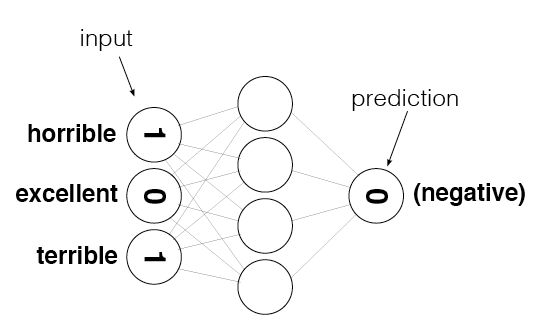

In [64]:
from IPython.display import Image

review = "This was a horrible, terrible movie."

Image(filename='sentiment_network.png')

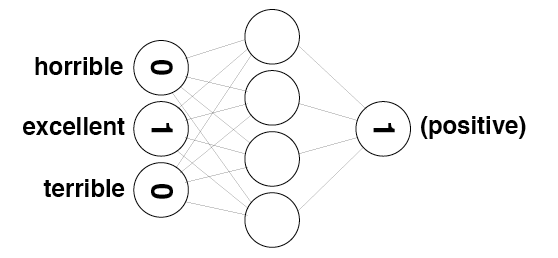

In [65]:
review = "The movie was excellent"

Image(filename='sentiment_network_pos.png')

# Project 2: Creating the Input/Output Data

In [66]:
vocab = set(pos_neg_ratios.keys())
vocab_size = len(vocab)
print(vocab_size)

2050


In [16]:
list(vocab)

['',
 'fawn',
 'tsukino',
 'raining',
 'nunnery',
 'deferment',
 'sonja',
 'shaye',
 'tilton',
 'gag',
 'woods',
 'spiders',
 'bedknob',
 'francesco',
 'woody',
 'trawling',
 'fopish',
 'comically',
 'localized',
 'sevens',
 'disobeying',
 'yougoslavia',
 'ingratiating',
 'canet',
 'scola',
 'acurately',
 'scold',
 'gteborg',
 'cycling',
 'originality',
 'mutinies',
 'unnecessarily',
 'hermann',
 'rumbustious',
 'benvolio',
 'familiarness',
 'fyodor',
 'wracked',
 'staffed',
 'gandolphini',
 'donger',
 'eugenics',
 'dongen',
 'appropriation',
 'transvestism',
 'blodgett',
 'strictest',
 'screaming',
 'seamier',
 'bendan',
 'four',
 'wooded',
 'receiving',
 'liaisons',
 'grueling',
 'broiler',
 'wooden',
 'bucatinsky',
 'tambin',
 'broiled',
 'altagracia',
 'circuitry',
 'crotch',
 'stereotypical',
 'path',
 'shows',
 'burgade',
 'spoilerish',
 'thrace',
 'gaskets',
 'snuggles',
 'hanging',
 'scrapes',
 'feasibility',
 'miniatures',
 'snuggest',
 'zaniacs',
 'mortgages',
 'sustaining',


In [71]:
import numpy as np

layer_0 = np.zeros((1,vocab_size))
layer_0

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])

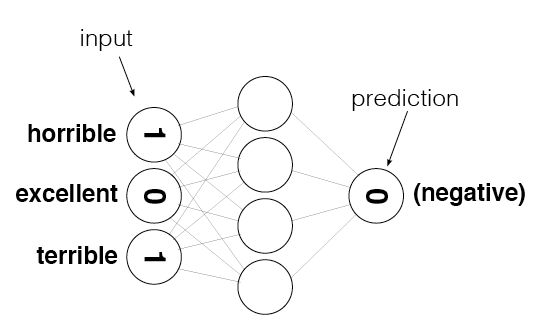

In [18]:
from IPython.display import Image
Image(filename='sentiment_network.png')

In [69]:
word2index = {}

for i,word in enumerate(vocab):
    word2index[word] = i
word2index

{'': 0,
 'limited': 1,
 'child': 2,
 'four': 3,
 'woods': 4,
 'sleep': 5,
 'captain': 6,
 'hate': 7,
 'poorly': 8,
 'relationships': 9,
 'whose': 10,
 'buddy': 11,
 'paris': 12,
 'whatsoever': 13,
 'under': 14,
 'lord': 15,
 'sorry': 16,
 'worth': 17,
 'every': 18,
 'jack': 19,
 'screaming': 20,
 'school': 21,
 'wooden': 22,
 'murders': 23,
 'ups': 24,
 'clothes': 25,
 'enjoy': 26,
 'forget': 2002,
 'force': 27,
 'tired': 28,
 'japanese': 29,
 'second': 30,
 'street': 31,
 'n': 32,
 'even': 246,
 'saved': 34,
 'weren': 36,
 'above': 37,
 'new': 38,
 'ever': 39,
 'disney': 40,
 'told': 41,
 'hero': 42,
 'men': 314,
 'here': 44,
 'met': 45,
 'studio': 46,
 'cult': 47,
 'kids': 48,
 'daughter': 49,
 'leaves': 50,
 'changed': 51,
 'credit': 52,
 'crap': 1648,
 'military': 53,
 'changes': 54,
 'golden': 55,
 'fantastic': 56,
 'explained': 57,
 'highly': 58,
 'brought': 59,
 'moral': 60,
 'total': 61,
 'plot': 62,
 'would': 63,
 'army': 64,
 'hospital': 65,
 'negative': 66,
 'music': 67,
 't

In [72]:
def update_input_layer(review):
    
    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    for word in review.split(" "):
        if(word2index.has_key(word)):
            layer_0[0][word2index[word]] += 1

update_input_layer(reviews[0])

In [73]:
layer_0

array([[ 18.,   0.,   0., ...,   0.,   0.,   0.]])

In [74]:
def get_target_for_label(label):
    if(label == 'POSITIVE'):
        return 1
    else:
        return 0

In [23]:
labels[0]

'POSITIVE'

In [24]:
get_target_for_label(labels[0])

1

In [25]:
labels[1]

'NEGATIVE'

In [26]:
get_target_for_label(labels[1])

0

# Project 3: Building a Neural Network

- Start with your neural network from the last chapter
- 3 layer neural network
- no non-linearity in hidden layer
- use our functions to create the training data
- create a "pre_process_data" function to create vocabulary for our training data generating functions
- modify "train" to train over the entire corpus

### Where to Get Help if You Need it
- Re-watch previous week's Udacity Lectures
- Chapters 3-5 - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) - (40% Off: **traskud17**)

In [75]:
import time
import sys
import numpy as np

# Let's tweak our network from before to model these phenomena
class SentimentNetwork:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.1):
       
        # set our random number generator 
        np.random.seed(1)
    
        self.pre_process_data(reviews, labels)
        
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)
        
        
    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
         
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        self.learning_rate = learning_rate
        
        self.layer_0 = np.zeros((1,input_nodes))
    
        
    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        for word in review.split(" "):
            if(word in self.word2index.keys()):
                self.layer_0[0][self.word2index[word]] += 1
                
    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def train(self, training_reviews, training_labels):
        
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        
        start = time.time()
        
        for i in range(len(training_reviews)):
            
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###

            # Input Layer
            self.update_input_layer(review)

            # Hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)

            # Output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))

            #### Implement the backward pass here ####
            ### Backward pass ###

            # TODO: Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # TODO: Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # TODO: Update the weights
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate # update input-to-hidden weights with gradient descent step

            if(np.abs(layer_2_error) < 0.5):
                correct_so_far += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        
        correct = 0
        
        start = time.time()
        
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                            + "% #Correct:" + str(correct) + " #Tested:" + str(i+1) + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        
        # Input Layer
        self.update_input_layer(review.lower())

        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # Output layer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] > 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"
        

In [28]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)

In [29]:
# evaluate our model before training (just to show how horrible it is)
mlp.test(reviews[-1000:],labels[-1000:])

Progress:2.5% Speed(reviews/sec):0.960% #Correct:13 #Tested:26 Testing Accuracy:50.0%

KeyboardInterrupt: 

In [30]:
# train the network
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:0.00% Speed(reviews/sec):0.666 #Correct:1 #Trained:3 Training Accuracy:33.3%

KeyboardInterrupt: 

In [31]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.01)

In [32]:
# train the network
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:0.00% Speed(reviews/sec):1.118 #Correct:0 #Trained:2 Training Accuracy:0.0%

KeyboardInterrupt: 

In [33]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.001)

KeyboardInterrupt: 

In [34]:
# train the network
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%


KeyboardInterrupt: 

# Understanding Neural Noise

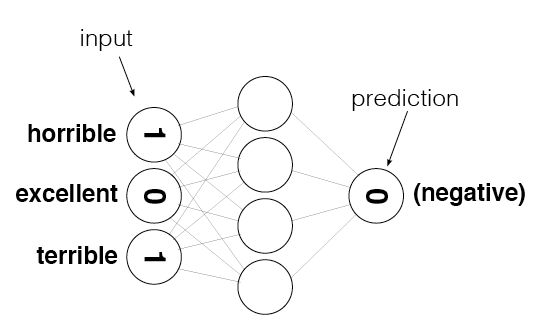

In [35]:
from IPython.display import Image
Image(filename='sentiment_network.png')

In [36]:
def update_input_layer(review):
    
    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1

update_input_layer(reviews[0])

In [37]:
layer_0

array([[ 18.,   0.,   0., ...,   0.,   0.,   0.]])

In [38]:
review_counter = Counter()

In [39]:
for word in reviews[0].split(" "):
    review_counter[word] += 1

In [40]:
review_counter.most_common()

[('.', 27),
 ('', 18),
 ('the', 9),
 ('to', 6),
 ('high', 5),
 ('i', 5),
 ('bromwell', 4),
 ('teachers', 4),
 ('of', 4),
 ('that', 4),
 ('is', 4),
 ('a', 4),
 ('school', 2),
 ('their', 2),
 ('me', 2),
 ('my', 2),
 ('it', 2),
 ('as', 2),
 ('at', 2),
 ('in', 2),
 ('students', 2),
 ('student', 2),
 ('all', 1),
 ('years', 1),
 ('financially', 1),
 ('through', 1),
 ('teaching', 1),
 ('far', 1),
 ('schools', 1),
 ('immediately', 1),
 ('remind', 1),
 ('t', 1),
 ('right', 1),
 ('some', 1),
 ('welcome', 1),
 ('see', 1),
 ('expect', 1),
 ('closer', 1),
 ('what', 1),
 ('lead', 1),
 ('who', 1),
 ('pathetic', 1),
 ('burn', 1),
 ('here', 1),
 ('pity', 1),
 ('about', 1),
 ('s', 1),
 ('isn', 1),
 ('whole', 1),
 ('think', 1),
 ('fetched', 1),
 ('profession', 1),
 ('sack', 1),
 ('one', 1),
 ('down', 1),
 ('your', 1),
 ('satire', 1),
 ('much', 1),
 ('survive', 1),
 ('insightful', 1),
 ('life', 1),
 ('pomp', 1),
 ('recalled', 1),
 ('repeatedly', 1),
 ('line', 1),
 ('believe', 1),
 ('than', 1),
 ('pettines

# Project 4: Reducing Noise in our Input Data

In [79]:
import time
import sys
import numpy as np

# Let's tweak our network from before to model these phenomena
class SentimentNetwork:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.1):
       
        # set our random number generator 
        np.random.seed(1)
    
        self.pre_process_data(reviews, labels)
        
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)
        
        
    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
         
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        self.learning_rate = learning_rate
        
        self.layer_0 = np.zeros((1,input_nodes))
    
        
    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        for word in review.split(" "):
            if(word in self.word2index.keys()):
                self.layer_0[0][self.word2index[word]] = 1
                
    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def train(self, training_reviews, training_labels):
        
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        
        start = time.time()
        
        for i in range(len(training_reviews)):
            
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###

            # Input Layer
            self.update_input_layer(review)

            # Hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)

            # Output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))

            #### Implement the backward pass here ####
            ### Backward pass ###

            # TODO: Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # TODO: Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # TODO: Update the weights
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate # update input-to-hidden weights with gradient descent step

            if(np.abs(layer_2_error) < 0.5):
                correct_so_far += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        
        correct = 0
        
        start = time.time()
        
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                            + "% #Correct:" + str(correct) + " #Tested:" + str(i+1) + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        
        # Input Layer
        self.update_input_layer(review.lower())

        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # Output layer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] > 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"
        

In [42]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)

In [43]:
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:0.12% Speed(reviews/sec):1.093 #Correct:10 #Trained:31 Training Accuracy:32.2%

KeyboardInterrupt: 

In [44]:
# evaluate our model before training (just to show how horrible it is)
mlp.test(reviews[-1000:],labels[-1000:])

Progress:0.9% Speed(reviews/sec):1.077% #Correct:5 #Tested:10 Testing Accuracy:50.0%

KeyboardInterrupt: 

# Analyzing Inefficiencies in our Network

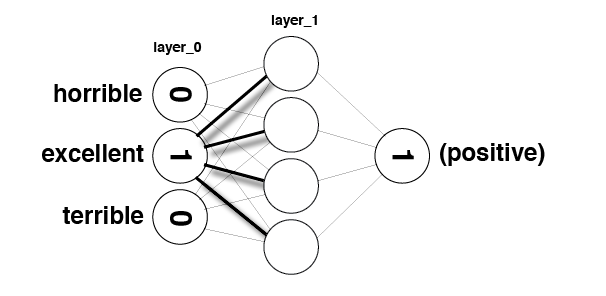

In [45]:
Image(filename='sentiment_network_sparse.png')

In [46]:
layer_0 = np.zeros(10)

In [47]:
layer_0

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [48]:
layer_0[4] = 1
layer_0[9] = 1

In [49]:
layer_0

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.])

In [50]:
weights_0_1 = np.random.randn(10,5)

In [51]:
layer_0.dot(weights_0_1)

array([-0.10503756,  0.44222989,  0.24392938, -0.55961832,  0.21389503])

In [52]:
indices = [4,9]

In [53]:
layer_1 = np.zeros(5)

In [54]:
for index in indices:
    layer_1 += (weights_0_1[index])

In [55]:
layer_1

array([-0.10503756,  0.44222989,  0.24392938, -0.55961832,  0.21389503])

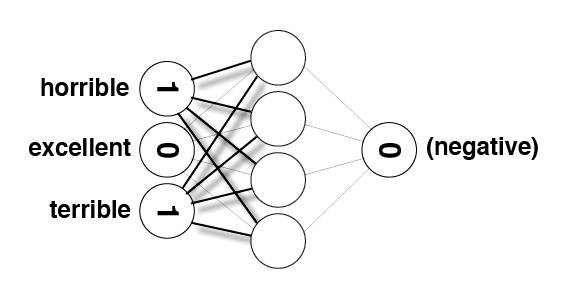

In [56]:
Image(filename='sentiment_network_sparse_2.png')

# Mini Project 5

In [76]:
import time
import sys

# Let's tweak our network from before to model these phenomena
class SentimentNetwork:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.1):
       
        np.random.seed(1)
    
        self.pre_process_data(reviews)
        
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)
        
        
    def pre_process_data(self,reviews):
        
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
         
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        self.learning_rate = learning_rate
        
        self.layer_0 = np.zeros((1,input_nodes))
        self.layer_1 = np.zeros((1,hidden_nodes))
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        for word in review.split(" "):
            self.layer_0[0][self.word2index[word]] = 1

    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def train(self, training_reviews_raw, training_labels):
        
        training_reviews = list()
        for review in training_reviews_raw:
            indices = set()
            for word in review.split(" "):
                if(word in self.word2index.keys()):
                    indices.add(self.word2index[word])
            training_reviews.append(list(indices))
        
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        
        start = time.time()
        
        for i in range(len(training_reviews)):
            
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###

            # Input Layer

            # Hidden layer
#             layer_1 = self.layer_0.dot(self.weights_0_1)
            self.layer_1 *= 0
            for index in review:
                self.layer_1 += self.weights_0_1[index]
            
            # Output layer
            layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))

            #### Implement the backward pass here ####
            ### Backward pass ###

            # Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights
            self.weights_1_2 -= self.layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            
            for index in review:
                self.weights_0_1[index] -= layer_1_delta[0] * self.learning_rate # update input-to-hidden weights with gradient descent step

            if(np.abs(layer_2_error) < 0.5):
                correct_so_far += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
        
    
    def test(self, testing_reviews, testing_labels):
        
        correct = 0
        
        start = time.time()
        
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                            + "% #Correct:" + str(correct) + " #Tested:" + str(i+1) + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        
        # Input Layer


        # Hidden layer
        self.layer_1 *= 0
        unique_indices = set()
        for word in review.lower().split(" "):
            if word in self.word2index.keys():
                unique_indices.add(self.word2index[word])
        for index in unique_indices:
            self.layer_1 += self.weights_0_1[index]
        
        # Output layer
        layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] > 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"
        

In [80]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)


In [81]:
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:0.02% Speed(reviews/sec):0.962 #Correct:2 #Trained:8 Training Accuracy:25.0%

KeyboardInterrupt: 

In [82]:
# evaluate our model before training (just to show how horrible it is)
mlp.test(reviews[-1000:],labels[-1000:])

Progress:0.2% Speed(reviews/sec):1.307% #Correct:2 #Tested:3 Testing Accuracy:66.6%

KeyboardInterrupt: 